In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import plotly as py
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from statsmodels.graphics.regressionplots import abline_plot

**Importing csv file and first 5 rows**

In [2]:
df = pd.read_csv("csv-1.csv")
df.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,23.2,21.5,25.0,21.5 - 25.0,NaN


**ANXIETY**

In [3]:
mask = df["Indicator"] == "Symptoms of Anxiety Disorder"
anx_df = df[mask]

anx_df.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
70,Symptoms of Anxiety Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,30.8,30.0,31.7,30.0 - 31.7,NaN
71,Symptoms of Anxiety Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,40.2,38.1,42.4,38.1 - 42.4,NaN
72,Symptoms of Anxiety Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,34.4,32.6,36.1,32.6 - 36.1,NaN
73,Symptoms of Anxiety Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,34.1,32.1,36.2,32.1 - 36.2,NaN
74,Symptoms of Anxiety Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,31.0,29.0,33.1,29.0 - 33.1,NaN


**ANXIETY by Race**

In [4]:
mask = anx_df["Group"] == "By Race/Hispanic ethnicity"
anx_race_df = anx_df[mask]

anx_race_df.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
80,Symptoms of Anxiety Disorder,By Race/Hispanic ethnicity,United States,Hispanic or Latino,1,Apr 23 - May 5,36.3,33.4,39.2,33.4 - 39.2,NaN
81,Symptoms of Anxiety Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic white, single race",1,Apr 23 - May 5,29.0,28.2,29.9,28.2 - 29.9,NaN
82,Symptoms of Anxiety Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic black, single race",1,Apr 23 - May 5,32.8,30.3,35.5,30.3 - 35.5,NaN
83,Symptoms of Anxiety Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic Asian, single race",1,Apr 23 - May 5,26.3,23.6,29.1,23.6 - 29.1,NaN
84,Symptoms of Anxiety Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic, other races and multiple races",1,Apr 23 - May 5,38.2,34.3,42.3,34.3 - 42.3,NaN


**Race Grouping for Anxiety**

In [5]:
races = anx_race_df.groupby("Subgroup")[["Value"]].describe()
races

Value                             \
                                             count       mean       std   min   
Subgroup                                                                        
Hispanic or Latino                             7.0  34.585714  1.680703  32.1   
Non-Hispanic Asian, single race                7.0  25.457143  2.050900  22.2   
Non-Hispanic black, single race                7.0  33.271429  1.755671  30.2   
Non-Hispanic white, single race                7.0  28.557143  1.428119  26.3   
Non-Hispanic, other races and multiple races   7.0  38.514286  3.952395  31.3   

                                                                        
                                                25%   50%    75%   max  
Subgroup                                                                
Hispanic or Latino                            33.60  34.0  36.25  36.3  
Non-Hispanic Asian, single race               24.50  26.0  26.30  28.4  
Non-Hispanic black, single race               32.75  33.0  34.20  35.8  
Non-Hispanic white, single race               27.70  29.0  29.30  30.6  
Non-Hispanic, other races and multiple races  37.90  38.6  39.65  44.6

In [6]:
# separate into different races
h_mask = anx_race_df["Subgroup"] == "Hispanic or Latino"
h_race = anx_race_df[h_mask]

a_mask = anx_race_df["Subgroup"] == "Non-Hispanic Asian, single race"
a_race = anx_race_df[a_mask]

b_mask = anx_race_df["Subgroup"] == "Non-Hispanic black, single race"
b_race = anx_race_df[b_mask]

w_mask = anx_race_df["Subgroup"] == "Non-Hispanic white, single race"
w_race = anx_race_df[w_mask]

o_mask = anx_race_df["Subgroup"] == "Non-Hispanic, other races and multiple races"
o_race = anx_race_df[o_mask]

In [7]:
# extract values
h = h_race[["Value"]]
a = a_race[["Value"]]
b = b_race[["Value"]]
w = w_race[["Value"]]
o = o_race[["Value"]]

**T-test (2-sided alternative)**

**Hispanic or Latino vs Asian**

In [8]:
stats.ttest_ind(h, a, 
                equal_var = False).pvalue[0]

1.2941885190937998e-06

**Hispanic or Latino vs Black**

In [9]:
stats.ttest_ind(h, b, 
                equal_var = False).pvalue[0]

0.17808372613464812

**Hispanic or Latino vs White**

In [10]:
stats.ttest_ind(h, w, 
                equal_var = False).pvalue[0]

1.2001770041696471e-05

**Hispanic or Latino vs Other/Multiple Races**

In [11]:
stats.ttest_ind(h, o, 
                equal_var = False).pvalue[0]

0.04147766952158347

**Visualization of Race Difference**

Text(0.5, 1.0, 'Mean Value by Race')

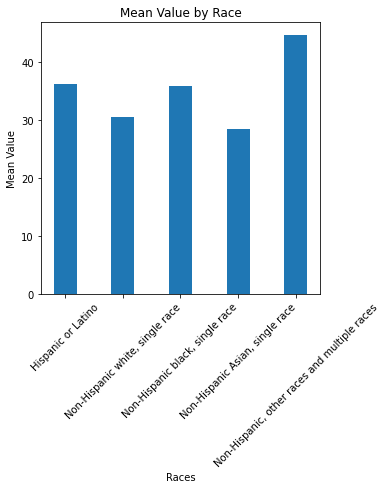

In [12]:
fig = plt.figure(figsize = (5, 5))

plt.bar(anx_race_df["Subgroup"], 
        anx_race_df["Value"], 
       width = 0.4)

plt.xlabel("Races")

plt.xticks(rotation=45)

plt.ylabel("Mean Value")

plt.title("Mean Value by Race")

**Simple Linear Regression + ANOVA TEST**

$$y = \beta_0 + \beta_1x_1$$

In [13]:
model = ols('Value ~ C(Subgroup)', 
            data = anx_race_df).fit()

sm.stats.anova_lm(model, type = 2)

,df,sum_sq,mean_sq,F,PR(>F)
C(Subgroup),4.0,737.596000,184.399000,33.195993,1.271709e-10
Residual,30.0,166.645714,5.554857,NaN,NaN


In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     33.20
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           1.27e-10
Time:                        22:11:27   Log-Likelihood:                -76.972
No. Observations:                  35   AIC:                             163.9
Df Residuals:                      30   BIC:                             171.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      34.5857      0.891     38.825      0.000      32.766      36.405
C(Subgroup)[T.Non-Hispanic Asian, single race]                 -9.1286      1.260     -7.246      0.000     -11.701      -6.556
C(Subgroup)[T.Non-Hispanic black, single race]                 -1.3143      1.260     -1.043      0.305      -3.887       1.259
C(Subgroup)[T.Non-Hispanic white, single race]                 -6.0286      1.260     -4.785      0.000      -8.601      -3.456
C(Subgroup)[T.Non-Hispanic, other races and multiple races]     3.9286      1.260      3.118      0.004       1.356       6.501
==============================================================================
Omnibus:                        8.668   Durbin-Watson:                   1.563
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               12.228
Skew:                          -0.488   Prob(JB):                      0.00221
Kurtosis:                       5.726   Cond. No.                         5.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model.pvalues

Intercept                                                      3.303173e-27
C(Subgroup)[T.Non-Hispanic Asian, single race]                 4.571503e-08
C(Subgroup)[T.Non-Hispanic black, single race]                 3.051680e-01
C(Subgroup)[T.Non-Hispanic white, single race]                 4.268754e-05
C(Subgroup)[T.Non-Hispanic, other races and multiple races]    3.992643e-03
dtype: float64

Text(0.5, 0, 'Race')

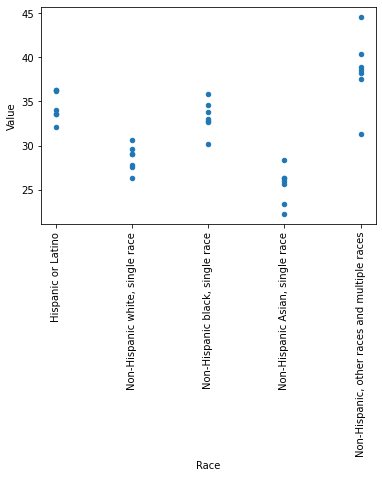

In [16]:
ax = anx_race_df.plot(x = 'Subgroup',
                      y='Value', 
                      kind='scatter')

plt.xticks(rotation = 90)

plt.xlabel("Race")

Text(0, 0.5, 'Race')

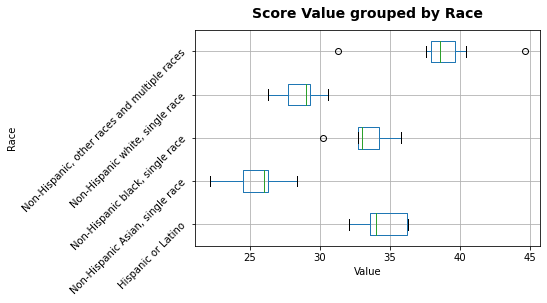

In [18]:
anx_race_df.boxplot(column = "Value",
                    by = "Subgroup",
                   vert = False)

plt.yticks(rotation = 45)

plt.suptitle('Score Value grouped by Race', fontsize=14, fontweight='bold')
plt.title("")
plt.xlabel("Value")
plt.ylabel("Race")

**Conclusion**

With respect for Hispanic or Latino (and assuming they are significantly anxious), Asians, Whites, and other races have significantly different scores from that of Hispanic or Latino. No comment can be made about Blacks however.